# Which Countries Love America the Most?
In this project, we extract US favorability from the quotations provided in the QuoteBank dataset.
The steps are as follows:
1. Load the dataset chunk by chunk and apply a keyword filter
2. Drop quotes with "None" speakers
3. Add the nationality of speakers to the dataframe
4. Extract the sentiment of the quotes using a sentiment analysis library
5. Show US favorability for every country
6. Load PEW Research Center Dataset and describe it
7. Compare the datasets of PEW and QuoteSentiment


## 1. Load QuoteBank
In this section, we show how to load the data and apply a filter to extract the quotes with special keywords.
However, this step is done on **Google Colab** because the process is faster.
The output files are saved in the colab and downloaded to have them locally.

The following code is run on Google Colab:



import bz2
import json

keywords = ["US ", "U.S", "USA", "United States"]

for year in range(2015, 2021) :
  path_to_file = '/content/drive/MyDrive/us_data/Quotebank/quotes-'+year+'.json.bz2'
  path_to_out = '/content/drive/MyDrive/us_data/Filtered_data/quotes-'+year+'-us.json.bz2'
  with bz2.open(path_to_file, 'rb') as s_file:
      with bz2.open(path_to_out, 'wb') as d_file:
          for instance in s_file:
              instance = json.loads(instance) # loading a sample
              quote = instance['quotation'] # extracting list of links
              if any(word in quote for word in keywords) :
                d_file.write((json.dumps(instance)+'\n').encode('utf-8')) # writing in the new file

## 2. Load US-filtered data locally
In this part, we load the filtered data year by year and concatenate into a single dataframe.
However, since our goal is to categorize the quotations by their speaker's nationality, we need to ignore the quotes
whose speaker is "None".

In [1]:
import pandas as pd

# Get the index of None speaker quo
def drop_none_speaker(year, df):
    print("Year : {} with {} quotes".format(year, len(df)))
    df_dropped = df[df.speaker != "None"]
    return df_dropped

def get_sample(ratio, df):
    occurrence_weight = df["numOccurrences"]/df["numOccurrences"].sum()
    sample_num = int(ratio * len(df))
    df_sampled = df.sample(n=sample_num, weights=occurrence_weight)
    return df_sampled

US_data = pd.DataFrame()
for year in range(2015, 2016) :
    year_df = pd.read_pickle('input/us_{}media.pkl.bz2'.format(year), compression='bz2')
    # year_df = drop_none_speaker(year, year_df)
    sampled_year_df = get_sample(ratio=0.01, df=year_df)
    US_data = pd.concat([US_data, year_df], axis=0)

US_data.sample(n=10)



Year : 2015 with 2201061 quotes


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment
30125,2015-01-12-081997,"We're delighted that from this Thursday, all a...",Peter Baumgartner,"[Q1370328, Q1455481, Q1643014, Q17487496, Q207...",2015-01-12 08:43:21,3,"[[Peter Baumgartner, 0.87], [None, 0.13]]",http://gulfnews.com/business/aviation/no-immig...,E,0.995851
383909,2015-09-07-064142,They'll probably say [ I'm ] competing with Be...,Jill Biden,[Q235349],2015-09-07 15:08:00,85,"[[Jill Biden, 0.8613], [None, 0.1365], [Beau B...",http://www.postandcourier.com/article/20150907...,E,-0.292621
410573,2015-06-23-042456,The American people understand that this is th...,Raul Labrador,[Q555393],2015-06-23 16:23:00,16,"[[Raul Labrador, 0.7974], [None, 0.2026]]",http://opb.org/news/article/npr-republicans-do...,E,0.275218
172396,2015-10-02-115204,"We put together a Benghazi special committee, ...",Kevin McCarthy,"[Q26837187, Q281404, Q56875753, Q6377709, Q639...",2015-10-02 00:05:19,12,"[[Kevin McCarthy, 0.7248], [None, 0.1282], [Ri...",http://www.kfqd.com/syndicated-article?id=64478,E,-0.244329
27817,2015-07-29-083771,"regrettably, the blanket application of the Le...",Muhammadu Buhari,[Q361567],2015-07-29 15:03:07,1,"[[Muhammadu Buhari, 0.6698], [None, 0.3302]]",http://blog.amnestyusa.org/africa/nigerian-pre...,E,-0.888366
432554,2015-09-07-044424,Now you're talking about a guy that was not ra...,Jim Tomsula,[Q14950508],2015-09-07 13:25:41,8,"[[Jim Tomsula, 0.5391], [None, 0.2719], [Antho...",http://www.modbee.com/sports/article34297887.html,E,0.951405
127994,2015-09-18-031962,I don't speak for Mr. Trump.,Corey Lewandowski,[Q20740735],2015-09-18 05:38:40,62,"[[Corey Lewandowski, 0.6929], [Robert Costa, 0...",http://www.usnews.com/news/blogs/ken-walshs-wa...,E,-0.801417
46298,2015-07-21-033622,I generally like how (Trump) says what's on hi...,Daniel Walcott,[Q20107247],2015-07-21 04:04:45,1,"[[Daniel Walcott, 0.6919], [None, 0.2989], [Jo...",http://triblive.com/news/allegheny/8773641-74/...,E,-0.999962
71145,2015-10-21-067285,it's critical that we enforce our trade laws t...,Heidi Heitkamp,[Q50597],2015-10-21 12:13:59,4,"[[Heidi Heitkamp, 0.8143], [None, 0.1005], [Jo...",http://crookstontimes.com/article/20151021/NEW...,E,0.837276
342234,2015-12-02-107814,The truth is that Hillary Clinton isn't giving...,Blaise Ingoglia,[Q18687921],2015-12-02 23:40:21,2,"[[Blaise Ingoglia, 0.8643], [None, 0.1205], [H...",http://tampabay.com/news/politics/stateroundup...,E,-0.694758


## 3. Add nationality to the main df
In this part, we use the speaker attributes dataset provided on the project web page. We need only id and nationality of
 the speakers; therefore, we keep these two columns. Then, we map the speaker id in Quotebank to this library.

In [2]:
import pandas as pd
speaker_df = pd.read_parquet("input/speaker_attributes.parquet")
speaker_df = speaker_df[['id', 'nationality']]
speaker_df.sample(n=5)

,id,nationality
8111678,Q6849662,None
3665838,Q12729189,[Q218]
2959340,Q75330322,None
5485100,Q95703654,None
4127394,Q75886378,None


In [3]:
US_data["speaker_id"] = US_data.qids.map(lambda x: x[0])

#join US_data with the corresponding speakers' attributes
US_merged = pd.merge(US_data, speaker_df, left_on=['speaker_id'], right_on=['id'], how='inner')
# Some speakers has no nationality. Let's drop them.
US_merged = US_merged[US_merged.nationality.notna()]
US_merged.sample(n=5)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment,speaker_id,id,nationality
760295,2015-03-30-049209,"Not to be overly patriotic, but we're an Ameri...",Bo Ryan,[Q4931159],2015-03-30 16:06:00,89,"[[Bo Ryan, 0.9338], [None, 0.0523], [Chris Duf...",http://news-sentinel.com/apps/pbcs.dll/article...,E,0.820692,Q4931159,Q4931159,[Q30]
59011,2015-06-16-046847,So ladies and gentlemen... I am officially run...,Donald Trump,"[Q22686, Q27947481]",2015-06-16 07:17:42,330,"[[Donald Trump, 0.6451], [None, 0.3249], [Ivan...",http://rss.cnn.com/~r/rss/cnn_allpolitics/~3/H...,E,0.972350,Q22686,Q22686,[Q30]
1088153,2015-02-14-019375,If you're going to have Jordan supporting the ...,Anthony Cordesman,[Q4772307],2015-02-14 08:47:20,3,"[[Anthony Cordesman, 0.628], [None, 0.372]]",http://www.worldbulletin.net/haberler/154998/u...,E,0.554413,Q4772307,Q4772307,[Q30]
244082,2015-07-14-017360,But it soon became clear that the NRSC had eve...,Ted Cruz,[Q2036942],2015-07-14 09:15:20,8,"[[Ted Cruz, 0.5186], [None, 0.2783], [Josh Hol...",http://www.politico.com/story/2015/07/ted-cruz...,E,-0.773929,Q2036942,Q2036942,"[Q30, Q16]"
9165,2015-10-13-088639,the American people are sick and tired of hear...,Bernie Sanders,[Q359442],2015-10-13 10:14:00,1842,"[[Bernie Sanders, 0.63], [None, 0.2155], [Hill...",http://patriotpost.us/opinion/38289,E,-0.968833,Q359442,Q359442,[Q30]


Now, we have the speaker's nationality. However the nationality is coded as Q_i where i is an integer.
To translate this id to the name of the country we use *Wikidata API* to create a dictionary of country ids and names.



In [4]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

#sparkql query to get the country name and their respective quids from wikidata
query = """#List of present-day countries and capital(s)
SELECT DISTINCT ?country ?countryLabel
WHERE
{
  ?country wdt:P31 wd:Q3624078 .

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
ORDER BY ?countryLabel"""

'''
query internet dataset:
endpoint_url (string): url of corresponding dataset
query (string): sparksql query
'''
def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

#Build a country dictionnary {quid, country name}
country_dict = {}
for result in results["results"]["bindings"]:
    country_id = result["country"]['value'].split('/')[-1]
    country_dict[country_id] = result["countryLabel"]['value']
country_dict

{'Q889': 'Afghanistan',
 'Q222': 'Albania',
 'Q262': 'Algeria',
 'Q228': 'Andorra',
 'Q916': 'Angola',
 'Q781': 'Antigua and Barbuda',
 'Q414': 'Argentina',
 'Q399': 'Armenia',
 'Q408': 'Australia',
 'Q40': 'Austria',
 'Q227': 'Azerbaijan',
 'Q398': 'Bahrain',
 'Q902': 'Bangladesh',
 'Q244': 'Barbados',
 'Q184': 'Belarus',
 'Q31': 'Belgium',
 'Q242': 'Belize',
 'Q962': 'Benin',
 'Q917': 'Bhutan',
 'Q750': 'Bolivia',
 'Q225': 'Bosnia and Herzegovina',
 'Q963': 'Botswana',
 'Q155': 'Brazil',
 'Q921': 'Brunei',
 'Q219': 'Bulgaria',
 'Q965': 'Burkina Faso',
 'Q967': 'Burundi',
 'Q424': 'Cambodia',
 'Q1009': 'Cameroon',
 'Q16': 'Canada',
 'Q1011': 'Cape Verde',
 'Q929': 'Central African Republic',
 'Q657': 'Chad',
 'Q298': 'Chile',
 'Q739': 'Colombia',
 'Q970': 'Comoros',
 'Q800': 'Costa Rica',
 'Q224': 'Croatia',
 'Q204920': 'Crown of Aragon',
 'Q241': 'Cuba',
 'Q229': 'Cyprus',
 'Q213': 'Czech Republic',
 'Q1008': "Côte d'Ivoire",
 'Q756617': 'Danish Realm',
 'Q974': 'Democratic Republic 

In [5]:
# Add nationality of speaker from the country dictionary
US_with_nation = US_merged.explode('nationality')
US_with_nation.nationality = US_with_nation.nationality.map(country_dict)
US_with_nation.sample(n=5)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,sentiment,speaker_id,id,nationality
60274,2015-12-11-121328,to control our U.S. politicians with daddy's m...,Donald Trump,"[Q22686, Q27947481]",2015-12-11 06:24:25,31,"[[Donald Trump, 0.7471], [None, 0.2344], [Evan...",http://www.wibw.com/home/headlines/Trump-calls...,E,-0.058808,Q22686,Q22686,United States of America
1216176,2015-08-30-069486,When we were working on the plot it just seeme...,Alex Kendrick,[Q621514],2015-08-30 14:32:46,6,"[[Alex Kendrick, 0.8106], [None, 0.1894]]",http://bangordailynews.com/2015/08/31/living/h...,E,-0.393621,Q621514,Q621514,United States of America
75183,2015-07-15-035275,I am concerned by the potential national secur...,John McCain,[Q10390],2015-07-15 20:42:03,16,"[[John McCain, 0.7143], [None, 0.2857]]",http://us.rd.yahoo.com/finance/news/rss/story/...,E,-0.552284,Q10390,Q10390,United States of America
786650,2015-04-21-058943,There have been problems with systematic and p...,Phil Robertson,[Q14755515],2015-04-21 17:03:13,31,"[[Phil Robertson, 0.9335], [None, 0.0665]]",http://www.sfgate.com/news/crime/article/US-le...,E,0.867352,Q14755515,Q14755515,United States of America
540379,2015-03-03-078689,The relationship between the United States and...,Susan Rice,"[Q23848423, Q50612]",2015-03-03 10:44:00,6,"[[Susan Rice, 0.8889], [None, 0.0918], [Benjam...",http://live5news.com/story/28245721/white-hous...,E,-0.960320,Q23848423,Q23848423,United Kingdom


## 4. Get Sentiments
In this part, we get the sentiment of the quotes. We use a pre-trained library to extract the sentiment.
Any other libraries can be replaced here. In this milestone we used *nltk* because it is faster than other famous libraries.
For the next milestone, the library may be changed.

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/alireza/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
sia = SentimentIntensityAnalyzer()
# predict the sentiment of each quotation in the range [-1, 1]
US_with_nation["sentiment"] = US_with_nation.quotation.apply(lambda x: sia.polarity_scores(x)["compound"])
US_with_nation.sample(n=5)


,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_id,id,nationality,sentiment
55920,2017-04-05-080851,It's not right to connect with racism before p...,Sushma Swaraj,[Q1652493],2017-04-05 07:26:58,1,"[[Sushma Swaraj, 0.8364], [None, 0.1636]]",[http://www.india.com/news/india/sushma-swaraj...,E,Q1652493,Q1652493,India,-0.7906
91058,2015-04-10-079857,They (the U.S. and her allies) shouldn't be al...,Ali Khamenei,[Q57336],2015-04-10 03:58:40,1,"[[Ali Khamenei, 0.8768], [None, 0.0933], [Bara...",[http://www.commdiginews.com/politics-2/tower-...,E,Q57336,Q57336,Iran,0.3182
197907,2019-04-12-119611,What is needed is for the U.S. to stop its cur...,Kim Jong Un,"[Q14045951, Q56226]",2019-04-12 22:13:50,21,"[[Kim Jong Un, 0.3924], [None, 0.3891], [Kim J...",[http://www.straitstimes.com/asia/east-asia/no...,E,Q14045951,Q14045951,Spain,-0.2960
465560,2015-12-27-037085,the control system in this form is already est...,Alexander Dobrindt,[Q85783],2015-12-27 00:00:00,51,"[[Alexander Dobrindt, 0.8602], [None, 0.1331],...",[http://abcnews.go.com/International/wireStory...,E,Q85783,Q85783,Germany,0.0000
158567,2015-01-14-012753,Cruz hopes to attach an amendment lifting the ...,Ted Cruz,[Q2036942],2015-01-14 13:21:58,2,"[[Ted Cruz, 0.7196], [None, 0.2804]]",[http://feeds.washingtonpost.com/c/34656/f/669...,E,Q2036942,Q2036942,United States of America,-0.6771


## 5. Billion-Dollar Question: How much people love US?
In this part, we show the US favorability using the quotes. The sentiment average and the number of quotes for each country
is represented in the following figures.

<AxesSubplot:title={'center':'Number of quotes'}, ylabel='nationality'>

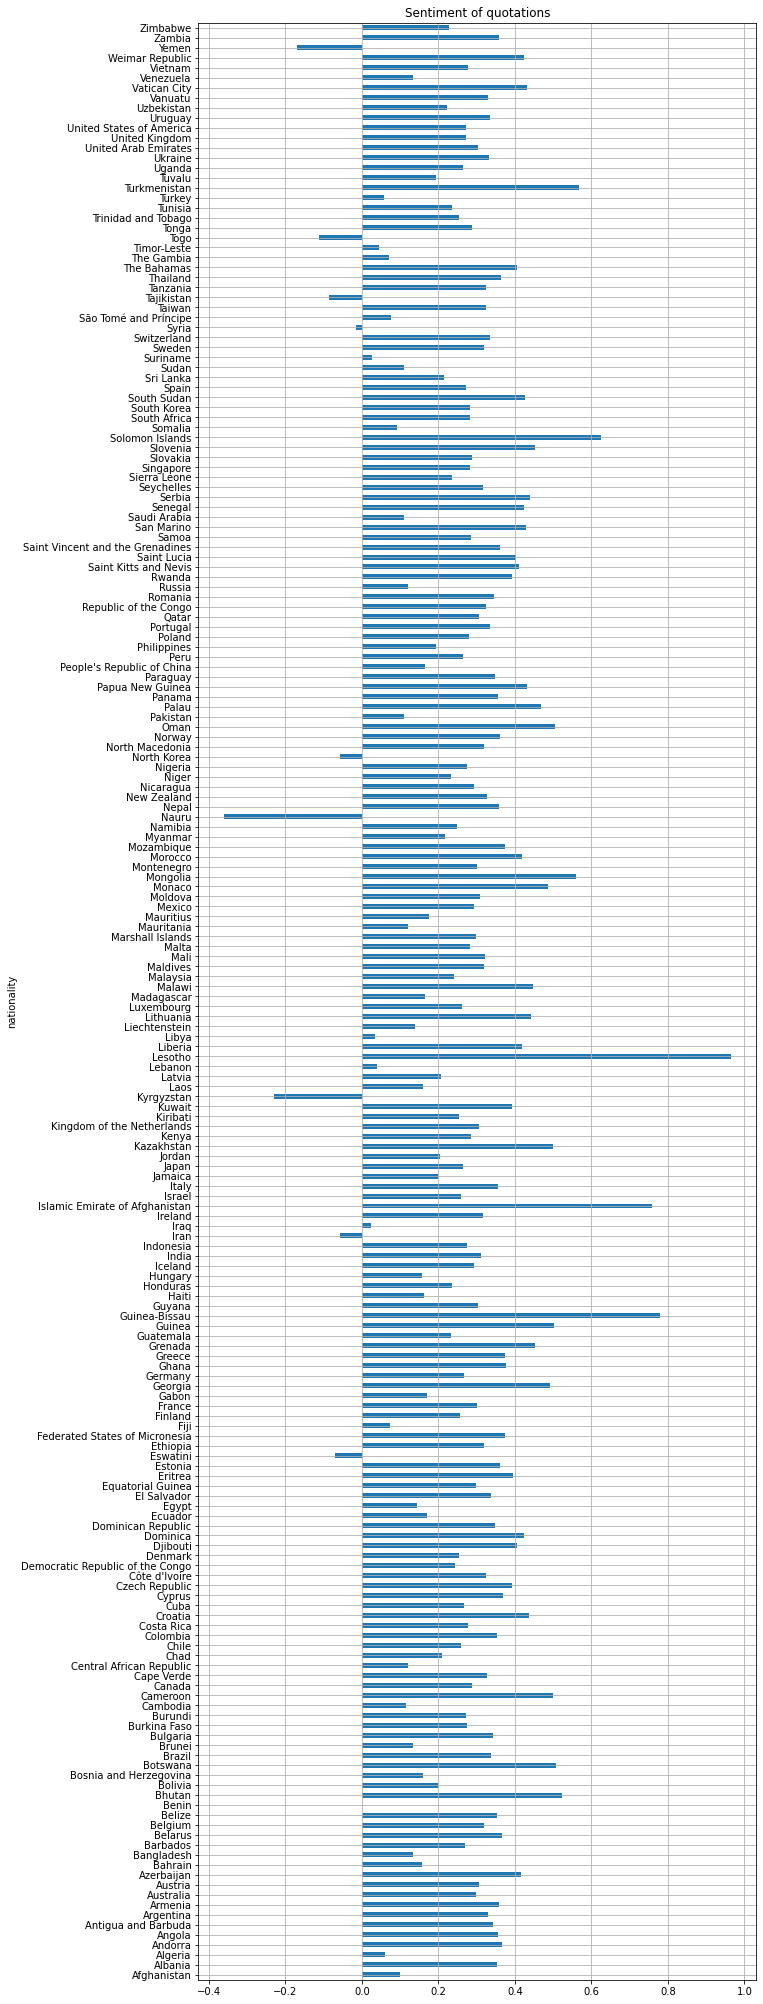

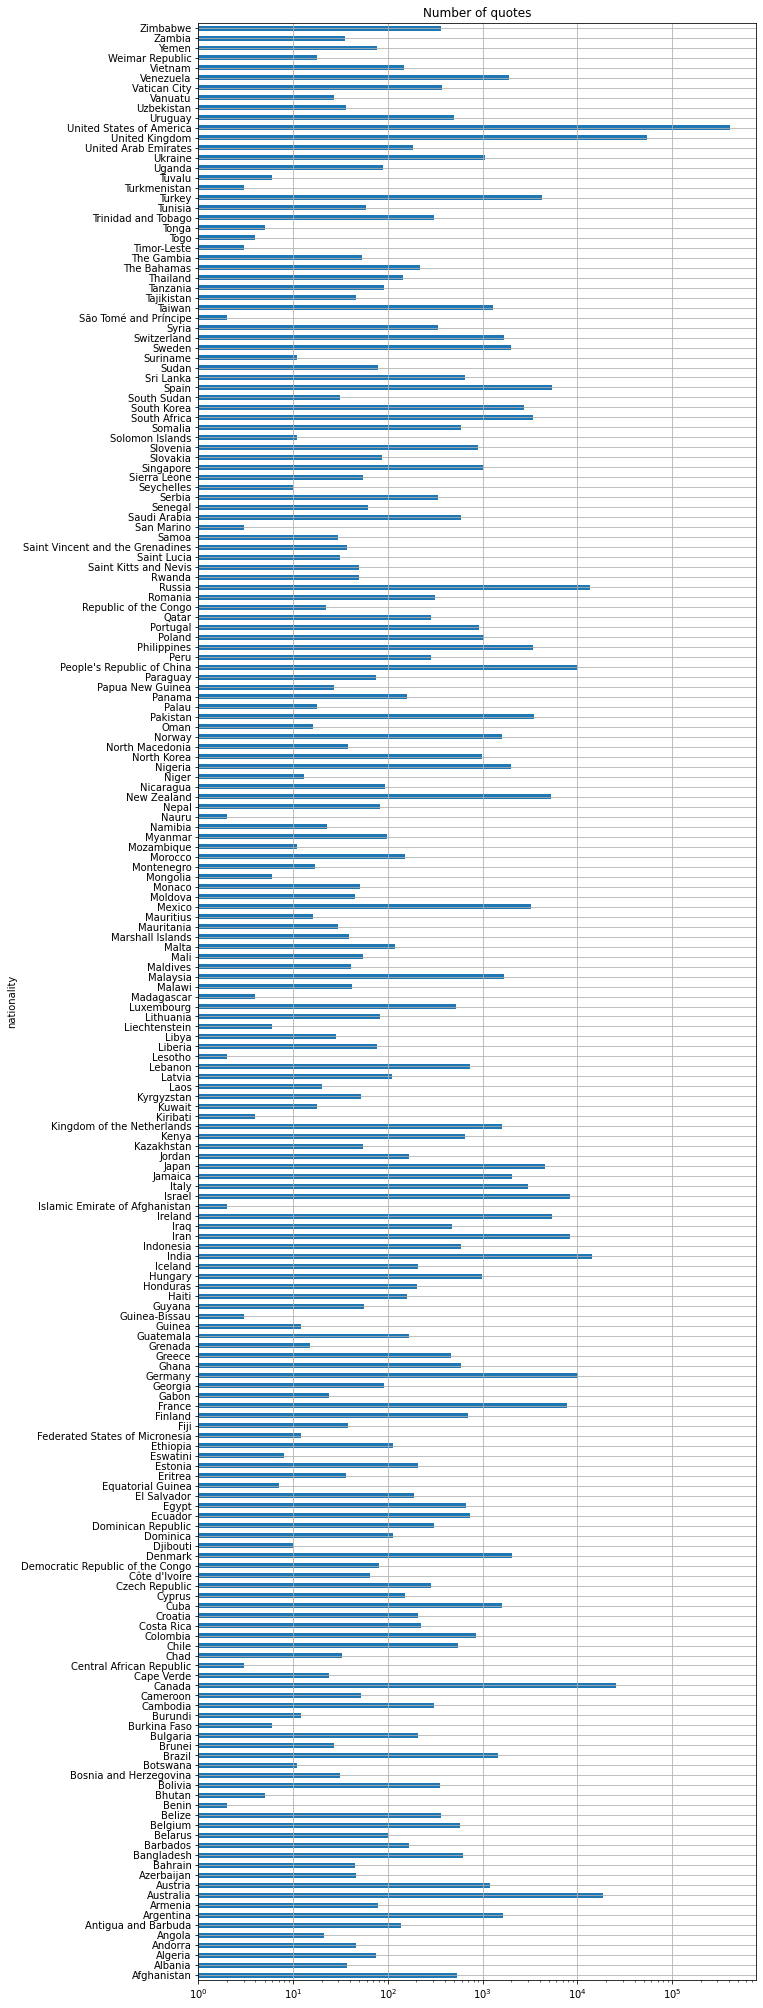

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 36))
plt.title("Sentiment of quotations")
#average sentiment for each country
US_love_mean = US_with_nation.groupby("nationality")["sentiment"].mean()
US_love_mean.plot.barh(grid=True)

plt.figure(figsize=(10,36))
plt.title("Number of quotes")
#count the number of quotes for each country
US_with_nation.groupby("nationality")["sentiment"].count().plot.barh(grid=True, log=True, align='center')


To make a brief analysis, in overall, most the countries seem at first sight more favorable to the USA.. Unsuprisingly the distribution of the number of quotes per country is highly non-uniform.

#### Map creation
In this part we show the countries on the map. Since the name of some countries are different in the map library we
need to assign new names in our table.

In [40]:
country_name_map = {
    "People's Republic of China": "China",
    "Kingdom of the Netherlands": "Netherlands",
    "Republic of the Congo": "Congo",
    "South Sudan": "S. Sudan",
    "Democratic Republic of the Congo": "Dem. Rep. Congo",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "Czech Republic": "Czechia",
    "North Macedonia": "Macedonia",
    "The Bahamas": "Bahamas",
    "Dominican Republic": "Dominican Rep.",
    "Solomon Islands": "Solomon Is.",
    "Central African Republic": "Central African Rep."}

US_with_new_nation = US_with_nation.replace(country_name_map)
US_love_mean = US_with_new_nation.groupby("nationality")["sentiment"].mean()

In [42]:

import geopandas
#load world map dataframe
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#connect US_data with map dataframe
table = world.merge(US_love_mean, how="left", left_on=['name'], right_on=['nationality'])


# Clean data: remove rows with no data
table = table.dropna(subset=['sentiment'])

In [45]:
import folium

#create Map object to do the plot
my_map = folium.Map()

# Map parameters with as color foreach country its sentiment average
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['name', 'sentiment'],
    key_on='feature.properties.name',
    fill_color='RdYlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sentiment of Quotes',
    missing_kwds={'color': 'white'}
).add_to(my_map)

#Save Map figure
my_map.save('us_love.html')

## 6. Load PEW Research Center Dataset

In this section, the datasets provided by PEW research center are loaded and processed.
We extract the nationality, sex, age of the participants and also their answer to the question: "How much you like the
United States?"

In [11]:
!pip install pyreadstat

column_names = ['country', 'fav_us', 'sex', 'age']

#columns labels foreach year (have changed over time)
#"fav_US" denoting their negative or positive view (i.e. their "sentiments") towards the U.S.A.
columns = {2015: ['COUNTRY', 'Q12A', 'Q145', 'Q146'],
           2016: ['country', 'Q10A', 'q107', 'q108'],
           2017: ['Country', 'fav_US', 'sex', 'age'],
           2018: ['COUNTRY', 'fav_US', 'sex', 'age'],
           2019: ['country', 'FAV_US', 'SEX', 'AGE'],
           2020: ['country', 'fav_US', 'sex', 'age']}

pew = pd.DataFrame()

for year in range(2015, 2021):
    #create dataframe from PEW dataset
    pew_year = pd.read_spss("input/pew/{}.sav".format(year))
    pew_year_fav = pew_year[columns[year]]
    pew_year_fav.columns = column_names
    pew_year_fav['year'] = year
    #concat each year to one dataframe
    pew = pd.concat([pew, pew_year_fav], axis=0, ignore_index=True)

#Save the pew dataframe
pew.to_csv('input/pew.csv', index=False)


In [46]:
import pandas as pd
import numpy as np

pew = pd.read_csv('input/pew.csv')

#List of "invalid" answers in pew dataset
Nan_keywords = ['Refused', 'Don’t know', 'Don’t know (DO NOT READ)', 'Refused (DO NOT READ)',
       '(VOL) Refused', "(VOL)\xa0Don't know"]

pew = pew.replace(to_replace=Nan_keywords, value=np.NaN)

#map "sentiment" to float values
fav_dict = {'Somewhat favorable': 0.5, 'Very favorable':1,
       'Somewhat unfavorable':-0.5, 'Very unfavorable':-1}

pew = pew.replace(fav_dict)


pew.sample(n=5)


,country,fav_us,sex,age,year
50673,Spain,-0.5,Female,29.0,2016
158437,Japan,-0.5,Male,75.0,2019
144738,Bulgaria,-0.5,Female,34.0,2019
42296,Burkina Faso,1.0,Female,60.0,2015
25221,Venezuela,1.0,Female,33.0,2015


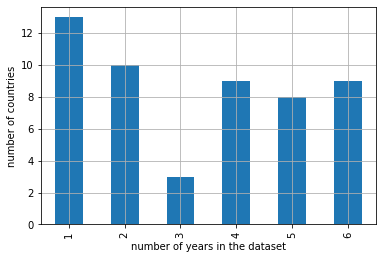

In [13]:
# foreach country, count the number of years it has appeared in the PEW yearly report
# then count the number of country who has appeared 1, 2, 3 times, etc...
pew.groupby('country')['year'].nunique().value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('number of years in the dataset')
plt.ylabel('number of countries')
plt.grid()



Unique Countries: 52


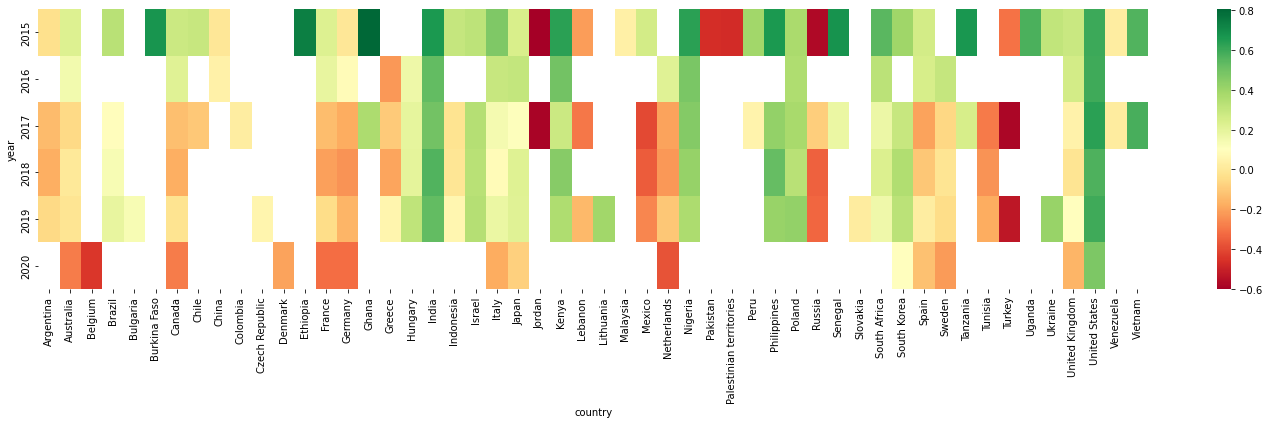

In [47]:
# heatmap for countries and years
import seaborn as sns
import matplotlib.pyplot as plt

pew_fav_us = pew.groupby(['country', 'year'], as_index=False)['fav_us'].mean()
pew_fav_pivot = pew_fav_us.pivot(index='year', columns='country', values='fav_us')
# pew_fav_pivot
plt.figure(figsize=(20,6))
sns.heatmap(pew_fav_pivot, cmap ='RdYlGn')
plt.tight_layout()
plt.savefig("output/pew_heatmap.jpg")
print("Unique Countries: {}".format(pew_fav_us.country.nunique()))

As we can see, there is few countries that have been analysed over all the years (only 9), and in total only around 50 countries appears in their reports.

### 7. Compare the datasets of PEW and QuoteSentiment

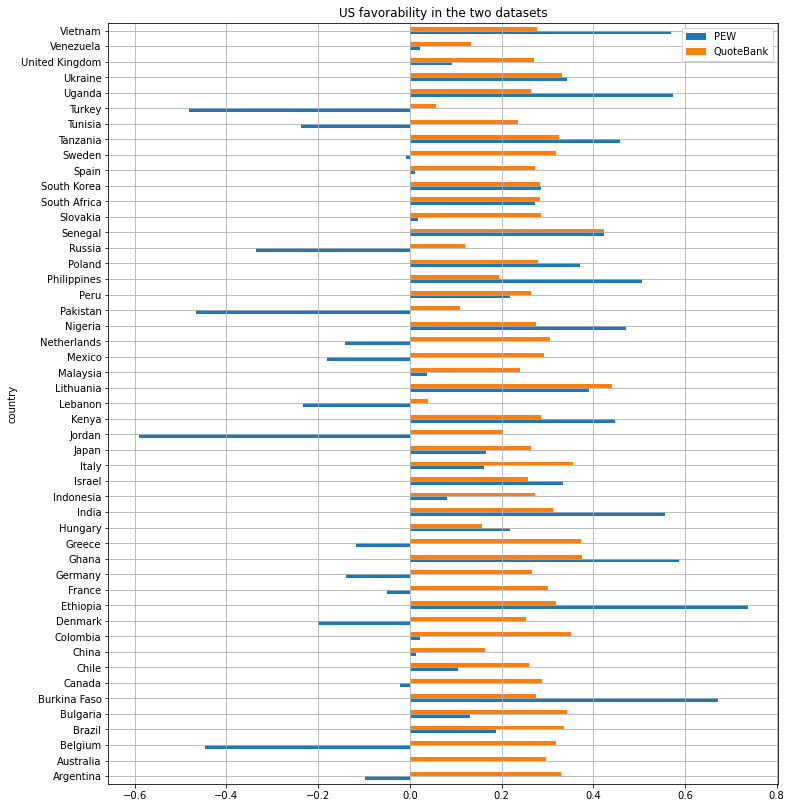

In [53]:
#Compute the mean sentiment for each country from the pew dataset report
pew_fav_us = pew.groupby('country')['fav_us'].mean().reset_index(name='PEW')
quote_fav_us = US_love_mean.reset_index(name='QuoteBank')
# merge the results of our sentiment analysis and the results of the pew dataset to create the plot
pew_quote_df = pd.merge(left=pew_fav_us, right=quote_fav_us, left_on='country', right_on='nationality')

pew_quote_df.plot(x= 'country', figsize=(12,14), kind='barh')
plt.title("US favorability in the two datasets")
plt.grid()
plt.savefig("output/compare_pew.png")

It appears that there is a large difference between the quotations sentiment analysis we have made and the one made in the pew study. We should not forget that this first analysis was made over a small dataset containing just one year.

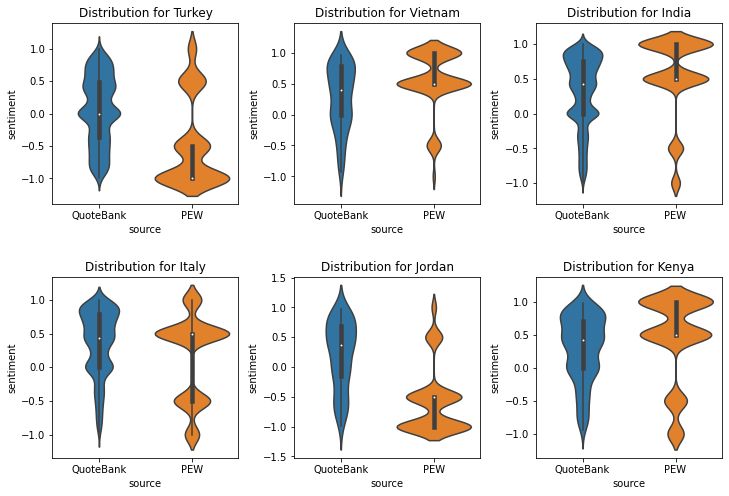

In [59]:
import seaborn as sns
US_with_nation["source"] = "QuoteBank"
pew["source"] = "PEW"
pew = pew.rename(columns={'fav_us': 'sentiment'})
fig = plt.figure(figsize=(12,8))
for idx, country_name in enumerate(["Turkey", "Vietnam", "India", "Italy", "Jordan", "Kenya"]):
    country_sentiment = US_with_nation[US_with_nation.nationality==country_name][["sentiment", "source"]]
    country_pew = pew[(pew.country==country_name)][["sentiment", "source"]]
    plt.subplot(2,3,idx+1)
    plt.title("Distribution for {}".format(country_name))
    sns.violinplot(x="source", y="sentiment", data=pd.concat([country_sentiment, country_pew]))

plt.subplots_adjust(wspace=0.3, hspace=0.4)


In [13]:
US_with_nation["year"] = US_with_nation.date.dt.strftime('%Y')

In [22]:
country_list = ['Argentina', 'Australia', 'Brazil', 'Canada', 'France', 'Germany', 'Greece', 'Hungary', 'India',
                'Indonesia', 'Israel', 'Italy', 'Japan', 'Kenya', 'Lebanon', 'Mexico', 'Kingdom of the Netherlands', 'Nigeria',
                'Philippines', 'Poland', 'Russia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Turkey',
                'Ukraine', 'United Kingdom', 'United States of America']
from scipy import stats

for country in country_list:
    obama_cond = (US_with_nation["nationality"] == country) & ((US_with_nation["year"] == '2015') | (US_with_nation["year"] == '2016'))
    trump_cond = (US_with_nation["nationality"] == country) & ((US_with_nation["year"] == '2019') | (US_with_nation["year"] == '2020'))
    obama_sentiment = US_with_nation[obama_cond]["sentiment"]
    trump_sentiment = US_with_nation[trump_cond]["sentiment"]
    _, p_value = stats.ttest_ind(obama_sentiment,trump_sentiment,alternative='two-sided')
    print("Country : {},\tObama: {:.2f}\tTrump: {:.2f}".format(country, obama_sentiment.mean(), trump_sentiment.mean()))
    print("P value: {}\n".format(p_value))


Country : Argentina,	Obama: 0.40	Trump: 0.21
P value: 3.98398643332095e-08

Country : Australia,	Obama: 0.32	Trump: 0.27
P value: 2.7812998962077115e-07

Country : Brazil,	Obama: 0.35	Trump: 0.30
P value: 0.15326618657856966

Country : Canada,	Obama: 0.30	Trump: 0.29
P value: 0.08707762790082633

Country : France,	Obama: 0.34	Trump: 0.26
P value: 2.001647058675278e-06

Country : Germany,	Obama: 0.30	Trump: 0.25
P value: 0.0008167181680847943

Country : Greece,	Obama: 0.33	Trump: 0.38
P value: 0.41158051280954233

Country : Hungary,	Obama: 0.08	Trump: 0.16
P value: 0.1250054055836782

Country : India,	Obama: 0.34	Trump: 0.32
P value: 0.04790780138481843

Country : Indonesia,	Obama: 0.24	Trump: 0.27
P value: 0.6229069924148012

Country : Israel,	Obama: 0.25	Trump: 0.27
P value: 0.42841859649629754

Country : Italy,	Obama: 0.37	Trump: 0.29
P value: 0.0026162689584306106

Country : Japan,	Obama: 0.28	Trump: 0.26
P value: 0.31117024320659503

Country : Kenya,	Obama: 0.32	Trump: 0.25
P value

In [5]:
print("Total: {}\nPositive: {}\nNegative: {}".format(
    len(US_with_nation),
    len(US_with_nation[US_with_nation.sentiment > 0]),
    len(US_with_nation[US_with_nation.sentiment <= 0])
))

Total: 193779
Positive: 102367
Negative: 91412


## Topic detection

In [6]:
US_with_nation.drop(columns=['urls', 'probas'], inplace=True)

In [9]:
US_with_nation.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,phase,sentiment,speaker_id,id,nationality
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-06-18 10:00:00,1,E,-0.228475,Q15735939,Q15735939,United States of America
1,2015-03-05-016710,Every secretary of state prior to Hillary Clin...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-03-05 15:57:19,2,E,0.398312,Q15735939,Q15735939,United States of America
2,2015-03-05-016710,Every secretary of state prior to Hillary Clin...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-03-05 15:57:19,2,E,0.398312,Q15735939,Q15735939,United States of America
3,2015-01-09-089243,What do you think of Yoho and that crowd? Thes...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-01-09 17:04:19,1,E,-0.933972,Q15735939,Q15735939,United States of America
4,2015-08-20-143442,"When Hillary Clinton Quits This Election, We'r...",Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-08-20 10:56:37,1,E,0.598767,Q15735939,Q15735939,United States of America


In [7]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
US_with_nation["sentences"] = US_with_nation.quotation.apply(lambda x: sent_tokenize(x))
US_with_nation.head()



[nltk_data] Downloading package punkt to /home/alireza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,quoteID,quotation,speaker,qids,date,numOccurrences,phase,sentiment,speaker_id,id,nationality,sentences
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-06-18 10:00:00,1,E,-0.228475,Q15735939,Q15735939,United States of America,[How long do you think it'll take for Donald T...
1,2015-03-05-016710,Every secretary of state prior to Hillary Clin...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-03-05 15:57:19,2,E,0.398312,Q15735939,Q15735939,United States of America,[Every secretary of state prior to Hillary Cli...
2,2015-03-05-016710,Every secretary of state prior to Hillary Clin...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-03-05 15:57:19,2,E,0.398312,Q15735939,Q15735939,United States of America,[Every secretary of state prior to Hillary Cli...
3,2015-01-09-089243,What do you think of Yoho and that crowd? Thes...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-01-09 17:04:19,1,E,-0.933972,Q15735939,Q15735939,United States of America,"[What do you think of Yoho and that crowd?, Th..."
4,2015-08-20-143442,"When Hillary Clinton Quits This Election, We'r...",Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-08-20 10:56:37,1,E,0.598767,Q15735939,Q15735939,United States of America,"[When Hillary Clinton Quits This Election, We'..."


In [8]:
US_with_nation["token_sentences"] = US_with_nation.sentences.apply(lambda  x: [word_tokenize(sentence) for sentence in x])
US_with_nation.head()



,quoteID,quotation,speaker,qids,date,numOccurrences,phase,sentiment,speaker_id,id,nationality,sentences,token_sentences
0,2015-06-18-018819,How long do you think it'll take for Donald Tr...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-06-18 10:00:00,1,E,-0.228475,Q15735939,Q15735939,United States of America,[How long do you think it'll take for Donald T...,"[[How, long, do, you, think, it, 'll, take, fo..."
1,2015-03-05-016710,Every secretary of state prior to Hillary Clin...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-03-05 15:57:19,2,E,0.398312,Q15735939,Q15735939,United States of America,[Every secretary of state prior to Hillary Cli...,"[[Every, secretary, of, state, prior, to, Hill..."
2,2015-03-05-016710,Every secretary of state prior to Hillary Clin...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-03-05 15:57:19,2,E,0.398312,Q15735939,Q15735939,United States of America,[Every secretary of state prior to Hillary Cli...,"[[Every, secretary, of, state, prior, to, Hill..."
3,2015-01-09-089243,What do you think of Yoho and that crowd? Thes...,Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-01-09 17:04:19,1,E,-0.933972,Q15735939,Q15735939,United States of America,"[What do you think of Yoho and that crowd?, Th...","[[What, do, you, think, of, Yoho, and, that, c..."
4,2015-08-20-143442,"When Hillary Clinton Quits This Election, We'r...",Chris Matthews,"[Q15735939, Q25189328, Q5107375, Q5110828, Q51...",2015-08-20 10:56:37,1,E,0.598767,Q15735939,Q15735939,United States of America,"[When Hillary Clinton Quits This Election, We'...","[[When, Hillary, Clinton, Quits, This, Electio..."


In [9]:
from nltk.corpus import stopwords
from itertools import chain
nltk.download('stopwords')

US_keywords = ["us", "u.s", "usa", "united", "states", "american", "americans"]
speaker_keywords = ["trump", "york", "washington", "biden", "obama", "warren",
            "sanders", "hollywood", "harris", "cohen", "apple", "nixon",
            "clinton", "williams", "bush", "lincoln", "kennedy", "pompeo",
            "donald", "ocasio", "pence", "tesla", "don", "nelson",
            "tarantino", "baldwin", "bannon", "bolton", "barr"]
my_stopwords = stopwords.words('english') + US_keywords + speaker_keywords
US_with_nation["tokens"] = US_with_nation.token_sentences.apply(lambda sentences: list(chain.from_iterable(sentences)))
US_with_nation["tokens"] = US_with_nation.tokens.apply(lambda tokens: [token.lower() for token in tokens if token.isalpha()
                                                    and token.lower() not in my_stopwords and len(token)>1] )
US_with_nation.sample(n=6)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alireza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,quoteID,quotation,speaker,qids,date,numOccurrences,phase,sentiment,speaker_id,id,nationality,sentences,token_sentences,tokens
1187983,2015-05-22-008773,Complicity in such operations contradicts all ...,Ali Jaber,[Q12227804],2015-05-22 19:25:32,1,E,-0.225069,Q12227804,Q12227804,Lebanon,[Complicity in such operations contradicts all...,"[[Complicity, in, such, operations, contradict...","[complicity, operations, contradicts, allegati..."
265134,2015-01-28-031100,I look forward to fostering a new and improved...,Loretta Lynch,[Q6680965],2015-01-28 09:09:57,164,E,0.995956,Q6680965,Q6680965,United States of America,[I look forward to fostering a new and improve...,"[[I, look, forward, to, fostering, a, new, and...","[look, forward, fostering, new, improved, rela..."
894933,2015-09-23-116667,We are deeply saddened by the loss of a Yankee...,Yogi Berra,[Q367566],2015-09-23 00:00:00,381,E,-0.158808,Q367566,Q367566,United States of America,[We are deeply saddened by the loss of a Yanke...,"[[We, are, deeply, saddened, by, the, loss, of...","[deeply, saddened, loss, yankees, legend, hero..."
1282249,2015-10-28-006234,"American higher education has become what, in ...",Margaret Spellings,[Q262554],2015-10-28 17:39:26,1,E,-0.969031,Q262554,Q262554,United States of America,"[American higher education has become what, in...","[[American, higher, education, has, become, wh...","[higher, education, become, business, world, w..."
242925,2015-11-01-053161,Republican majorities have just given Presiden...,Ted Cruz,[Q2036942],2015-11-01 01:07:10,2,E,-0.235796,Q2036942,Q2036942,Canada,[Republican majorities have just given Preside...,"[[Republican, majorities, have, just, given, P...","[republican, majorities, given, president, ame..."
309416,2015-12-11-080283,"Obviously it has to be fail-safe, and that's w...",John Kerry,"[Q22316, Q6242998]",2015-12-11 18:54:58,9,E,0.650330,Q22316,Q22316,United States of America,"[Obviously it has to be fail-safe, and that's ...","[[Obviously, it, has, to, be, fail-safe, ,, an...","[obviously, people, need, deserve]"


In [5]:
from gensim import corpora
tokens = US_data.tokens.tolist()
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]
# print(corpus)


In [7]:
from gensim import models
for num_topics in [25, 50, 75, 100, 150, 200, 500]:
    lda_model = models.LdaModel(corpus, num_topics=num_topics,
                                id2word=dictionary_LDA,
                                alpha='auto',
                                eta='auto',
                                passes=4)
    coherence_model_lda = models.CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionary_LDA, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('Num Topics: {}, Coherence Score: {}'.format(num_topics, coherence_lda))


Num Topics: 25, Coherence Score: 0.34457682596492584
Num Topics: 50, Coherence Score: 0.3900746966741137
Num Topics: 75, Coherence Score: 0.3924898582030121
Num Topics: 100, Coherence Score: 0.4135879447515085
Num Topics: 150, Coherence Score: 0.4819930563825199
Num Topics: 200, Coherence Score: 0.5372166079291502
Num Topics: 500, Coherence Score: 0.6222854455439862


We choose a number of topic that marks the end of a rapid growth of calculated topic coherence. Thus, we chose 150
number of topics to have meaningful and interpretable topics. For the number of topic >= 200, we got lots of keywords
repeated in several topics.

In [8]:
from gensim import models
optimal_num_topics  = 150
optimal_model = models.LdaModel(corpus, num_topics=optimal_num_topics,
                                id2word=dictionary_LDA,
                                alpha='auto',
                                eta='auto',
                                passes=4)


In [9]:
optimal_model.save("output/topic/topic_model_150")
dictionary_LDA.save("output/topic/dictionary_150")
corpora.MmCorpus.serialize("output/topic/corpus", corpus)

In [10]:
coherence_model_lda = models.CoherenceModel(model=optimal_model, texts=tokens, dictionary=dictionary_LDA, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: {}'.format(coherence_lda))


Coherence Score: 0.443194845660002


In [22]:
for i,topic in optimal_model.show_topics(formatted=True, num_topics=150):
    print(str(i)+": "+ topic)
    print()

0: 0.269*"foreign" + 0.137*"policy" + 0.108*"days" + 0.097*"force" + 0.048*"directly" + 0.046*"strategy" + 0.045*"barack" + 0.035*"aircraft" + 0.031*"air" + 0.031*"inside"

1: 0.342*"getting" + 0.284*"life" + 0.167*"whatever" + 0.080*"living" + 0.079*"crazy" + 0.021*"precious" + 0.000*"soared" + 0.000*"ratify" + 0.000*"newtown" + 0.000*"sam"

2: 0.000*"cheered" + 0.000*"scream" + 0.000*"newtown" + 0.000*"soared" + 0.000*"heavens" + 0.000*"sam" + 0.000*"ratify" + 0.000*"neurotic" + 0.000*"toon" + 0.000*"instantly"

3: 0.739*"president" + 0.068*"investigation" + 0.033*"open" + 0.025*"asked" + 0.023*"authorities" + 0.021*"former" + 0.020*"vice" + 0.018*"massive" + 0.015*"current" + 0.012*"simply"

4: 0.387*"security" + 0.309*"national" + 0.105*"economic" + 0.082*"relationship" + 0.032*"concern" + 0.023*"bilateral" + 0.019*"enormous" + 0.017*"ties" + 0.010*"puts" + 0.006*"factor"

5: 0.876*"government" + 0.115*"others" + 0.000*"cheered" + 0.000*"newtown" + 0.000*"soared" + 0.000*"heavens" 

In [25]:
# US_with_nation = US_with_nation.drop(columns=['quotation', 'qids', 'urls', 'sentences', 'token_sentences'])

In [ ]:
!pip install pyLDAvis

In [14]:
num_topics = 150
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(topic_model=optimal_model, corpus=corpus, dictionary=dictionary_LDA, mds='mmds')
pyLDAvis.save_html(LDAvis_prepared, 'output/ldavis_prepared_'+ str(num_topics) +'total.html')
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
131    0.548797 -0.051227       1        1  6.107086
102   -0.027418 -0.539791       2        1  6.018911
110    0.024884 -0.535870       3        1  5.831582
134   -0.199672 -0.500661       4        1  5.579285
45     0.203728 -0.503582       5        1  5.382277
...         ...       ...     ...      ...       ...
108   -0.051779  0.240675     146        1  0.068188
111   -0.051779  0.240675     147        1  0.068188
112   -0.051779  0.240675     148        1  0.068188
17    -0.051779  0.240675     149        1  0.068188
99    -0.051779  0.240675     150        1  0.068188

[150 rows x 5 columns], topic_info=          Term          Freq         Total  Category  logprob  loglift
290       like  79830.000000  79830.000000   Default  30.0000  30.0000
54       going  73948.000000  73948.000000   Default  29.0000  29.0000
108      could  69266.000000  69266.000000   Default  28.0000  28.0000
1397      home  59280.000000  59280.000000   Default  27.0000  27.0000
1403       eat  45659.000000  45659.000000   Default  26.0000  26.0000
...        ...           ...           ...       ...      ...      ...
17      people      0.074759  26362.274851  Topic150  -9.5459  -5.4825
19       story      0.074759   1126.325918  Topic150  -9.5459  -2.3295
20          ca      0.074759   1502.926546  Topic150  -9.5459  -2.6180
21         jeb      0.074759     61.181778  Topic150  -9.5459   0.5833
29    entering      0.074759    490.379852  Topic150  -9.5459  -1.4980

[6921 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1983     51  0.902757     abandon
455       9  0.995616     ability
802       1  0.999063        able
1997     49  0.983497    absolute
1876     18  0.995168  absolutely
...     ...       ...         ...
286      36  0.998899       years
2408     53  0.995404         yet
1367     20  0.991867     yorkers
554      58  0.992542       young
1265     84  0.865785       zones

[1208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[132, 103, 111, 135, 46, 4, 116, 1, 97, 126, 129, 89, 73, 104, 137, 115, 127, 44, 38, 70, 91, 37, 36, 63, 51, 59, 19, 16, 55, 64, 39, 11, 75, 5, 80, 77, 69, 120, 21, 17, 92, 48, 72, 114, 41, 138, 6, 76, 150, 67, 50, 42, 90, 12, 61, 110, 32, 40, 45, 9, 15, 10, 24, 54, 22, 130, 149, 148, 62, 108, 106, 33, 118, 133, 34, 28, 57, 8, 143, 124, 52, 96, 60, 145, 87, 56, 94, 43, 71, 147, 79, 78, 26, 20, 23, 142, 136, 2, 85, 105, 86, 13, 47, 139, 122, 123, 141, 121, 7, 125, 14, 146, 144, 131, 140, 134, 3, 128, 49, 119, 84, 53, 58, 65, 66, 68, 35, 74, 31, 30, 29, 81, 82, 83, 88, 117, 27, 93, 95, 25, 98, 99, 101, 102, 107, 109, 112, 113, 18, 100])

In [87]:
topic_table = LDAvis_prepared.token_table
topic_table[topic_table["Term"] == "iran"]

,Topic,Freq,Term
term,,,
415,36,0.998217,iran


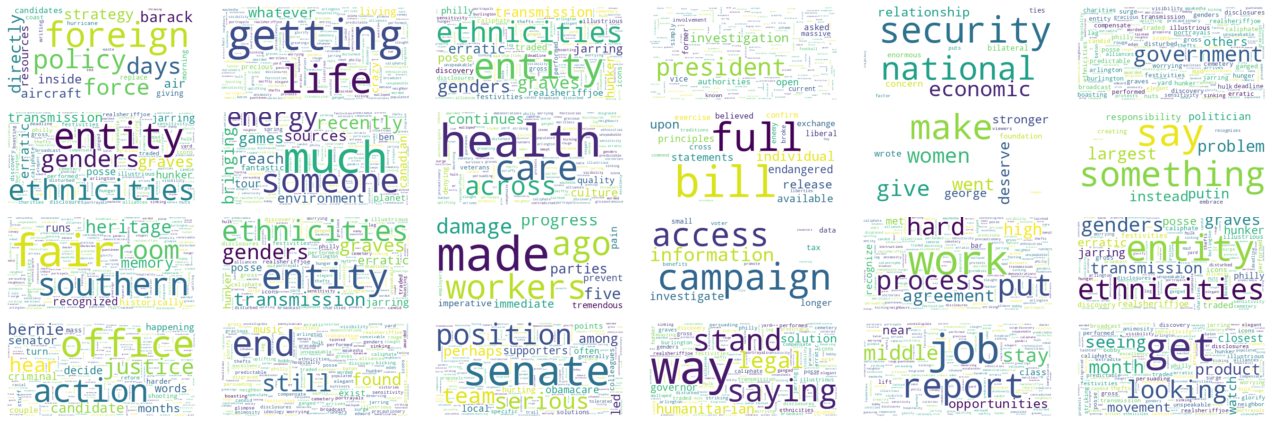

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig = plt.figure(figsize=(18,6))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.imshow(WordCloud(background_color="white").fit_words(dict(optimal_model.show_topic(i, 200))),
               interpolation='bilinear')
    plt.axis("off")
plt.tight_layout()
plt.savefig('output/wordcloud.png')


## Topic detection group by countries


In [10]:
from gensim import models
temp_file = "output/topic/topic_model_150"
pretrained_lda = models.LdaModel.load(temp_file)

In [59]:
from gensim import corpora
lda_dict = corpora.Dictionary.load("output/topic/dictionary_150")
lda_corp = corpora.MmCorpus("output/topic/corpus")

In [74]:
def get_dominant_topic(tok):
    topics_prob = pretrained_lda[lda_dict.doc2bow(tok)]
    topics_sorted = sorted(topics_prob, key=lambda x: (x[1]), reverse=True)
    dominant_num, dominant_prop = topics_sorted[0]
    return dominant_num

In [20]:
len(US_with_nation)

1394695

In [75]:
# get_dominant_topic(US_with_nation['tokens'].loc[10])
US_with_nation['topic'] = US_with_nation.tokens.apply(lambda x: get_dominant_topic(x))


In [76]:
US_with_nation.sample(n=5)

,quoteID,quotation,speaker,qids,date,numOccurrences,phase,sentiment,speaker_id,id,nationality,sentences,token_sentences,tokens,topic
918780,2015-11-11-102214,the United States and our international partne...,Steny Hoyer,[Q516515],2015-11-11 12:26:19,5,E,-0.199552,Q516515,Q516515,United States of America,[the United States and our international partn...,"[[the, United, States, and, our, international...","[international, partners, must, tolerate, atte...",126
279585,2015-11-17-102336,The United States government has neither the c...,Marco Rubio,[Q324546],2015-11-17 10:30:18,4,E,-0.999521,Q324546,Q324546,United States of America,[The United States government has neither the ...,"[[The, United, States, government, has, neithe...","[government, neither, competence, money, time,...",103
162481,2015-10-11-036875,like Washington in August... though for some r...,Henry Kissinger,[Q66107],2015-10-11 07:46:16,1,E,-0.363462,Q66107,Q66107,United States of America,[like Washington in August... though for some ...,"[[like, Washington, in, August, ..., though, f...","[like, august, though, reason, humidity, quite...",110
56632,2015-06-25-058704,They don't want me saying that Mexico is killi...,Donald Trump,"[Q22686, Q27947481]",2015-06-25 15:12:00,199,E,-0.876690,Q22686,Q22686,United States of America,[They don't want me saying that Mexico is kill...,"[[They, do, n't, want, me, saying, that, Mexic...","[want, saying, mexico, killing, trade, killing...",90
708027,2015-08-14-055450,It's outrageous that a mom can't go to Colorad...,Kirsten Gillibrand,[Q22222],2015-08-14 16:27:28,1,E,0.879387,Q22222,Q22222,United States of America,[It's outrageous that a mom can't go to Colora...,"[[It, 's, outrageous, that, a, mom, ca, n't, g...","[outrageous, mom, ca, go, colorado, buy, medic...",39


In [77]:
topic_nationality = US_with_nation[['quoteID','nationality', 'sentiment', 'topic']]

In [79]:
topic_nationality.to_pickle("output/nationality_topic.pkl")

In [1]:
import pandas as pd

topic_df_2015 = pd.read_pickle("output/topic/nationality_topic_2015.pkl")
topic_df_total = topic_df_2015.drop_duplicates(subset=['nationality', 'sentiment'])

for year in [2016, 2017, 2018]:
    topic_df = pd.read_pickle("output/topic/nationality_topic_{}.pkl".format(year))
    topic_df_total = pd.concat([topic_df_total, topic_df], axis =0)

topic_df_total.sample(n=15)

,nationality,sentiment,topic,quoteID
720817,Hungary,0.506014,71,2020-02-14-075705
1077346,United States of America,-0.206347,88,2019-07-11-008463
590125,United States of America,0.996017,15,2017-12-01-094717
109914,United States of America,0.885042,131,2017-03-20-146970
871705,United States of America,-0.729908,102,2016-12-26-030359
792925,Australia,0.936135,126,2018-11-23-048199
1094262,Brazil,0.989564,110,2018-09-07-011226
300504,United States of America,-0.372920,131,2019-03-19-003231
945071,United Kingdom,0.759567,31,2019-11-21-095966
133047,United States of America,0.238159,45,NaN


In [2]:
topic_df_total.to_csv('output/topic_nationality_total.csv')

In [15]:
TH = 0.4
# conditions = [topic_df.sentiment <= -TH, -TH <topic_df.sentiment < TH, topic_df.sentiment >=TH]
# for cond in conditions:

print("Negative :", (topic_df[topic_df.sentiment <= -TH]).groupby('nationality')['topic'].agg(pd.Series.mode))
print("\n\nNeutral :", (topic_df[(topic_df.sentiment > -TH) & (topic_df.sentiment < TH)]).groupby('nationality')['topic'].agg(pd.Series.mode))
print("\n\nPositive :", (topic_df[topic_df.sentiment > TH]).groupby('nationality')['topic'].agg(pd.Series.mode))


ValueError: Must produce aggregated value

In [20]:
# topic_df_removed = topic_df.drop_duplicates(subset=['nationality', 'sentiment'])
# (topic_df_removed[topic_df_removed.sentiment < -0.4]).groupby('nationality')['topic'].agg(pd.Series.mode)
#

nationality
Afghanistan             131
Albania            [45, 62]
Algeria                 131
Andorra                 136
Angola                   36
                     ...   
Vietnam                  36
Weimar Republic          45
Yemen                    90
Zambia              [7, 96]
Zimbabwe            [3, 96]
Name: topic, Length: 170, dtype: object

In [21]:
# (topic_df_removed[topic_df_removed.sentiment > 0]).groupby('nationality')['topic'].agg(pd.Series.mode)


nationality
Afghanistan                                                      131
Albania            [41, 43, 49, 76, 90, 96, 102, 110, 128, 131, 149]
Algeria                                                     [75, 90]
Andorra                                                    [50, 103]
Angola                                                            89
                                         ...                        
Vietnam                                                           96
Weimar Republic                                                   69
Yemen                                                             90
Zambia                                                           125
Zimbabwe                                                    [3, 131]
Name: topic, Length: 181, dtype: object